TP4 : Travail final


In [526]:
import os
import PyPDF2
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from thefuzz import fuzz
from thefuzz import process
import yake
from collections import Counter
from wordcloud import WordCloud
from IPython.display import Image
from rapidfuzz import process, fuzz
import re
import collections
import os
import string
import sys
import pandas as pd
from nltk import word_tokenize
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from scipy.spatial.distance import cosine
from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode
import networkx as nx
from sklearn.decomposition import TruncatedSVD

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\taleb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [527]:
#Lister les fichiers 
path = '../../data/camille_ecologie'

files = []
for f in os.listdir(path):
    if os.path.isfile(os.path.join(path, f)):
        files.append(f)

for f in files:
    print(f)


all.txt
BE-KBR00_15463334_19781001_99_00_00_0_01_0024_29589967.txt
BE-KBR00_15463334_19781201_100_00_00_0_01_0092_29591933.txt
BE-KBR00_15463334_19790601_101_00_00_0_01_0124_29593641.txt
BE-KBR00_15463334_19791101_103_00_00_0_01_0014_29592377.txt
BE-KBR00_15463334_19890701_137_00_00_0_01_0079_29699927.txt
KB_JB1051_1945-12-18_01-00003.txt
KB_JB1051_1951-09-05_01-00005.txt
KB_JB1051_1952-12-17_01-00004.txt
KB_JB1051_1952-12-26_01-00004.txt
KB_JB1051_1954-04-01_01-00004.txt
KB_JB1051_1958-10-15_01-00004.txt
KB_JB1051_1959-06-12_01-00001.txt
KB_JB1051_1961-03-07_01-00001.txt
KB_JB1051_1961-04-20_01-00001.txt
KB_JB1051_1961-11-20_01-00003.txt
KB_JB1051_1966-03-03_01-00002.txt
KB_JB421_1901-02-18_01-00001.txt
KB_JB421_1905-04-27_01-00001.txt
KB_JB421_1906-10-08_01-00002.txt
KB_JB421_1909-09-20_01-00001.txt
KB_JB421_1909-11-14_01-00003.txt
KB_JB421_1910-04-24_01-00002.txt
KB_JB421_1910-06-01_01-00003.txt
KB_JB427_1919-11-24_01-00002.txt
KB_JB427_1920-02-03_01-00004.txt
KB_JB427_1920-03-27_01

In [528]:
#Sauvgarde de tout les fichiers dans all.txt
txt_path = "../../data/camille_ecologie"

with open("../../data/camille_ecologie/all.txt", "w", encoding="utf-8") as output_file:
    for file in os.listdir(txt_path):
        if file.endswith(".txt") and file != "_README.txt":
            with open(os.path.join(txt_path, file), "r", encoding="utf-8") as f:
                output_file.write(f.read())
                output_file.write("\n")   


Exploration

In [590]:
#Lister les années de parytion des articles lié à l'écologie
path = "../../data/camille_ecologie/"
files = sorted(os.listdir(path))
print(f"{len(files)} files found.")

786 files found.


In [530]:

count_newspapers = defaultdict(int)

# Dictionnaire pour mapper les codes aux noms des journaux
journal_names = {
    'JB421': "L'Avenir du Luxembourg",
    'JB427': "La Libre Belgique",
    'JB555': "L'Indépendance belge",
    'JB555A': "L'Indépendance belge (édité en Angleterre)",
    'JB567': "Journal de Bruxelles",
    'JB572': "Journal de Charleroi",
    'JB638': "La Meuse",
    'JB685': "Le Petit Bleu",
    'JB729': "Le Vingtième Siècle",
    'JB773': "Vers l'Avenir",
    'JB837': "Le Peuple",
    'JB838': "Le Soir",
    'JB1051': "Le Drapeau rouge",
    'B14138': "La Presse"
}

# Parcours des fichiers
for f in os.listdir(txt_path):
    if f.endswith(".txt"):
        elems = f.split("_")
        # Cherche dans tous les éléments si l'un correspond à un code de journal
        journal_code = next((e for e in elems if e in journal_names), None)
        if journal_code:
            count_newspapers[journal_code] += 1

# Affichage des statistiques
for code, name in journal_names.items():
    print(f"{name} : {count_newspapers.get(code, 0)}")
    values = np.array([count_newspapers.get(code, 0) for code in journal_names])

# Calcul de la moyenne
mean_value = np.mean(values)

# Calcul de la médiane
median_value = np.median(values)

std_value = np.std(values)

var_value = np.var(values)
total = values.sum()
percentages = {journal_names[code]: (count_newspapers.get(code, 0)/total)*100 
               for code in journal_names}
cv = std_value / mean_value
print("\n--- Part relative de chaque journal (en % du corpus) ---")
print(f"Moyenne des publications par journal : {mean_value:.2f}")
print(f"Médiane des publications par journal : {median_value:.2f}")
print(f"Écart-type : {std_value:.2f}")
print(f"Variance : {var_value:.2f}")
print(f"Minimum : {values.min()} documents")
print(f"Maximum : {values.max()} documents")
print(f"Coefficient de variation : {cv:.2f}")
print("\n--- Statistiques globales ---") 
for name, pct in percentages.items():
    print(f"{name} : {pct:.2f}% du corpus")



L'Avenir du Luxembourg : 7
La Libre Belgique : 319
L'Indépendance belge : 86
L'Indépendance belge (édité en Angleterre) : 3
Journal de Bruxelles : 62
Journal de Charleroi : 32
La Meuse : 74
Le Petit Bleu : 10
Le Vingtième Siècle : 30
Vers l'Avenir : 44
Le Peuple : 20
Le Soir : 79
Le Drapeau rouge : 11
La Presse : 0

--- Part relative de chaque journal (en % du corpus) ---
Moyenne des publications par journal : 55.50
Médiane des publications par journal : 31.00
Écart-type : 78.44
Variance : 6152.39
Minimum : 0 documents
Maximum : 319 documents
Coefficient de variation : 1.41

--- Statistiques globales ---
L'Avenir du Luxembourg : 0.90% du corpus
La Libre Belgique : 41.06% du corpus
L'Indépendance belge : 11.07% du corpus
L'Indépendance belge (édité en Angleterre) : 0.39% du corpus
Journal de Bruxelles : 7.98% du corpus
Journal de Charleroi : 4.12% du corpus
La Meuse : 9.52% du corpus
Le Petit Bleu : 1.29% du corpus
Le Vingtième Siècle : 3.86% du corpus
Vers l'Avenir : 5.66% du corpus
Le

In [531]:
years = []
months = []
count_month = defaultdict(int)

for filename in os.listdir(path):
    # Ignorer certains fichiers
    if filename in ["_README.txt", "all.txt", "keywords.txt"]:
        continue
    
    # Première nomenclature : KB_JB421_1901-02-18_01-00001
    match1 = re.search(r'KB_JB\d+_(\d{4})-(\d{2})-\d{2}', filename)
    if match1:
        year = match1.group(1)
        month = match1.group(2)
        years.append(year)
        months.append(month)
        count_month[month] += 1
        continue
    
    # Deuxième nomenclature : BE-KBR00_15463334_19890701_137_00_00_0_01_0079_29699927
    match2 = re.search(r'BE-KBR00_\d+_(\d{4})(\d{2})\d{2}_', filename)
    if match2:
        year = match2.group(1)
        month = match2.group(2)
        years.append(year)
        months.append(month)
        count_month[month] += 1
        continue



In [532]:
#Lister les années de parution des articles lié à l'écologie 
extracted_years = sorted(set(years))
print("Années extraites:", extracted_years)

Années extraites: ['1836', '1838', '1843', '1844', '1845', '1848', '1849', '1851', '1852', '1853', '1854', '1855', '1856', '1857', '1858', '1860', '1863', '1864', '1865', '1866', '1867', '1868', '1869', '1870', '1871', '1872', '1873', '1874', '1875', '1876', '1877', '1878', '1879', '1880', '1881', '1882', '1884', '1885', '1886', '1887', '1888', '1889', '1890', '1891', '1892', '1894', '1895', '1896', '1897', '1898', '1899', '1900', '1901', '1902', '1903', '1904', '1905', '1906', '1907', '1908', '1909', '1910', '1911', '1912', '1913', '1914', '1916', '1918', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1942', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1978', '1979', '1989']


In [533]:
#Lister les années pour lesquels il ny a pas de parution d'articles lié à l'écologie 
# Plage complète des années
all_years = [str(year) for year in range(1800, 1971)]

# Années extraites (ton dataset)
extracted_years = sorted(set(years))

# Années manquantes
missing_years = [y for y in all_years if y not in extracted_years]

print(f"Années manquantes: {', '.join(missing_years)}")


Années manquantes: 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1837, 1839, 1840, 1841, 1842, 1846, 1847, 1850, 1859, 1861, 1862, 1883, 1893, 1915, 1917, 1941, 1943, 1953, 1962


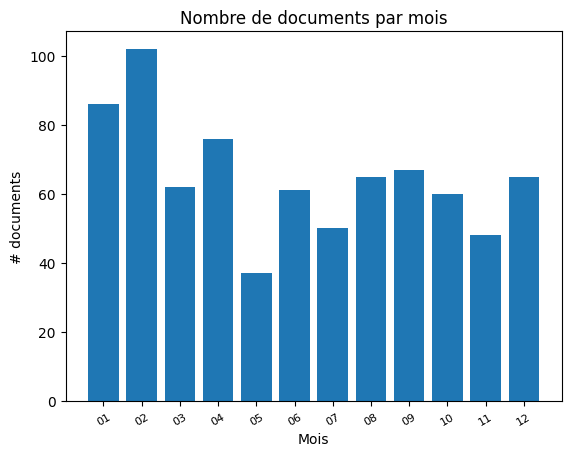

In [534]:
index = np.arange(len(count_month))
plt.bar(index, count_month.values())
plt.xlabel('Mois')
plt.ylabel('# documents')
plt.xticks(index, sorted(count_month.keys()), fontsize=8, rotation=30)
plt.title('Nombre de documents par mois')
plt.show()

Fréquences

In [535]:
mot_cible = "ecologie".lower()
total_occurrences = 0

for f in os.listdir(txt_path):
    if f.endswith(".txt"):
        fichier_path = os.path.join(txt_path, f)
        with open(fichier_path, "r", encoding="utf-8", errors="ignore") as file:
            contenu = file.read().lower()
            total_occurrences += contenu.count(mot_cible)

print(f"Le mot '{mot_cible}' apparaît {total_occurrences} fois au total dans le corpus.")

Le mot 'ecologie' apparaît 80 fois au total dans le corpus.


In [536]:
i=0
mot_cible = "ecologi".lower()
for f in os.listdir(txt_path):
    if f.endswith(".txt"):
        fichier_path = os.path.join(txt_path, f)
        with open(fichier_path, "r", encoding="utf-8", errors="ignore") as file:
            contenu = file.read().lower()  
            if mot_cible in contenu:
                i+=1
print(f"Le mot '{mot_cible}' apparaît dans {i} documents.")

Le mot 'ecologi' apparaît dans 41 documents.


In [537]:
data_path = "../../data/camille_ecologie/all.txt"
LIMIT = 50000000
text = open(data_path, "r", encoding="utf-8").read()[:LIMIT]

tokens = nltk.wordpunct_tokenize(text)
print(f"{len(tokens)} words (tokens) found")

vocab = set(tokens)
print(f"{len(vocab)} different word forms")

7369786 words (tokens) found
414599 different word forms


In [538]:
word = "ecologie"
word_list = process.extract(word, vocab, limit=45)

In [778]:
pprint(word_list)

[('ecologie', 100.0, 10720),
 ('ecrologie', 94.11764705882352, 56514),
 ('echologie', 94.11764705882352, 195127),
 ('mecologie', 94.11764705882352, 358193),
 ('eicologie', 94.11764705882352, 378654),
 ('eologie', 93.33333333333333, 183874),
 ('cologie', 93.33333333333333, 249435),
 ('og', 90.0, 30991),
 ('eco', 90.0, 107008),
 ('i', 90.0, 111464),
 ('e', 90.0, 126542),
 ('gie', 90.0, 127486),
 ('l', 90.0, 137733),
 ('ol', 90.0, 186306),
 ('ie', 90.0, 193086),
 ('ec', 90.0, 250337),
 ('ogi', 90.0, 252632),
 ('g', 90.0, 258097),
 ('olo', 90.0, 263022),
 ('o', 90.0, 288804),
 ('colo', 90.0, 302660),
 ('co', 90.0, 305790),
 ('lo', 90.0, 325531),
 ('log', 90.0, 332035),
 ('ogie', 90.0, 339478),
 ('gi', 90.0, 348872),
 ('col', 90.0, 364631),
 ('logi', 90.0, 388594),
 ('c', 90.0, 413252),
 ('logie', 90.0, 414482),
 ('erologie', 87.5, 11216),
 ('Ceologie', 87.5, 23487),
 ('scologie', 87.5, 27940),
 ('Écologie', 87.5, 39465),
 ('ceologie', 87.5, 43191),
 ('ecologne', 87.5, 60322),
 ('ebologie',

Mots clés

In [540]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [541]:
# Fichiers à ignorer
IGNORED_FILES = {"_README.txt", "all.txt", "keywords.txt", "newspapers.model"}

# Fonction pour lire un fichier quel que soit l'encodage
def read_text_safely(file_path):
    for enc in ("utf-8", "cp1252", "latin-1"):
        try:
            with open(file_path, "r", encoding=enc) as f:
                return f.read()
        except UnicodeDecodeError:
            continue
    return ""

# Liste des fichiers à traiter
files = [
    f for f in sorted(os.listdir(path))
    if os.path.isfile(os.path.join(path, f))
    and f not in IGNORED_FILES
]

all_keywords = []

# Traitement des fichiers
for filename in files:
    file_path = os.path.join(path, filename)

    # Lecture sécurisée
    text = read_text_safely(file_path)

    # Extraction des mots-clés
    keywords = kw_extractor.extract_keywords(text)

    # Garder uniquement les expressions de 2 mots
    kept = [kw for kw, score in keywords if len(kw.split()) == 2]

    print(f"{filename} mentionne ces mots-clés : {', '.join(kept)}...")

    # Ajouter à la liste globale
    all_keywords.extend(kept)

# Supprimer les doublons tout en gardant l'ordre
unique_keywords = list(dict.fromkeys(all_keywords))

# Écriture dans keywords.txt
output_file = os.path.join(path, "keywords.txt")
with open(output_file, "w", encoding="utf-8") as f:
    for kw in unique_keywords:
        f.write(kw + "\n")

print(f"\nTous les mots-clés ont été enregistrés dans keywords.txt ({len(unique_keywords)} mots-clés).")

BE-KBR00_15463334_19781001_99_00_00_0_01_0024_29589967.txt mentionne ces mots-clés : fut occupée, exposition organisée, Congrès RAI, Expo ’79...
BE-KBR00_15463334_19781201_100_00_00_0_01_0092_29591933.txt mentionne ces mots-clés : réservé exclusivement, jour fut, fut réservé, fut occupée, tribune installée, L'utilisation écono, Nouveaux supports, montra clairement, informations quotidiennes, lauditoire participèêrent, participèêrent également, président montra, d'une entreprise...
BE-KBR00_15463334_19790601_101_00_00_0_01_0124_29593641.txt mentionne ces mots-clés : d'où classement, d'une nouvelle, mauvais classement, fort difficile, permettre l'accès, révéler fort, chemises prises, localisation d'une, classement lors, place requise, créations d'un, d'un fichier, journaux pose, nouvelle n'existant, perdent suite, d'une installation, besoin d'une, oeuvre d'une, cartes porte-microfilms, Avantages d'une...
BE-KBR00_15463334_19791101_103_00_00_0_01_0014_29592377.txt mentionne ces mots-clés 

In [542]:
target_keywords = [
    # Climat & énergie
    "énergie solaire", "énergie éolienne", "énergie hydraulique", "énergie géothermique",
    "énergies renouvelables", "énergies fossiles", "transition énergétique", "sobriété énergétique",
    "efficacité énergétique", "mix énergétique",

    # Climat
    "changement climatique", "réchauffement climatique", "réchauffement global",
    "réchauffement polaire", "gaz à effet de serre", "neutralité carbone",
    "empreinte carbone", "bilan carbone", "compensation carbone",

    # Déchets & pollution
    "déchets plastiques", "pollution plastique", "pollution atmosphérique",
    "pollution industrielle", "pollution de l’eau", "pollution des sols",
    "réduction déchets", "recyclage déchets", "tri sélectif",

    # Biodiversité & nature
    "biodiversité menacée", "biodiversité marine", "espèces menacées", "extinction espèces",
    "protection faune", "protection flore", "préservation nature", "préservation écologique",
    "forêts primaires", "forêts tropicales", "zones humides", "corridors écologiques",

    # Forêt & sols
    "déforestation illégale", "incendies forêt", "reforestation durable",
    "érosion sol", "dégradation des sols",

    # Eau
    "eau potable", "ressources en eau", "gestion de l’eau", "aquifères naturels",

    # Agriculture
    "agriculture biologique", "agriculture durable", "agriculture intensive",
    "pesticides chimiques", "alternatives naturelles",

    # Océans
    "acidification océans", "pollution marine", "surpêche", "protection des océans",

    # Société & économie
    "économie circulaire", "développement durable", "responsabilité environnementale",
    "gestion durable", "consommation responsable",

    # Urbanisme & modes de vie
    "transition écologique", "mobilité durable", "transport écologique",
    "écologie urbaine", "écologie industrielle", "écologie sociale",
    "écologie marine", "écologie forestière", "écologie humaine",
    "écologie politique", "solutions écologiques",

    # Risques & catastrophes
    "catastrophes naturelles", "événements climatiques extrêmes"

    # Autres (classification)
    "ecologie grecque",    "ecologie hockey",    "ecologie holland",    "ecologie docu",    "ecologie biologie",
    "ecologie indulgence_pleniere",    "ecologie courrieres",    "ecologie optique",    "ecologie zwingelkalotten",
    "ecologie atre",    "ecologie couture",    "ecologie bclgo",    "ecologie les_amis",    "ecologie association_belge",
    "ecologie immobiliere",    "ecologie societe_royale",    "ecologie tionale",    "ecologie ement",    "ecologie dre",
    "ecologie insoumis"
]
for f in sorted(files):
    if f in ["_README.txt", "all.txt", "keywords.txt", "newspapers.model"]:
        continue

    file_path = os.path.join(path, f)
    with open(file_path, 'r', encoding="utf-8") as file:
        text = file.read()

    # Extraire les mots-clés
    keywords = kw_extractor.extract_keywords(text)

    # Garder uniquement les mots-clés composés de 2 mots
    kept = [kw for kw, score in keywords if kw in target_keywords]

    if kept:
        print(f"{f} mentions these keywords: {', '.join(kept)}")

KeyboardInterrupt: 

In [543]:
target = "ÉCOLOGIE"
threshold = 75

# Liste des fichiers à ignorer
skip_files = ["_README.txt", "all.txt", "keywords.txt", "newspapers.model"]

# Dictionnaire pour stocker les mots similaires et les fichiers où ils apparaissent
word_files = {}

# Parcours des fichiers du dossier
for filename in os.listdir(path):
    if filename in skip_files:
        continue  # on ignore ces fichiers

    file_path = os.path.join(path, filename)
    if os.path.isfile(file_path) and filename.endswith(".txt"):
        with open(file_path, 'r', encoding='utf-8') as f:
            words = f.read().split()
        
        # Recherche des mots similaires dans ce fichier
        similar_words = [w for w in words if fuzz.ratio(w, target) >= threshold]
        
        # Mise à jour du dictionnaire
        for word in similar_words:
            if word not in word_files:
                word_files[word] = []
            word_files[word].append(filename)

# Affichage des résultats
for word, files in word_files.items():
    print(f"Le mot '{word}' apparaît dans : {files}")

Le mot 'ECROLOGIE' apparaît dans : ['KB_JB1051_1961-03-07_01-00001.txt', 'KB_JB1051_1961-11-20_01-00003.txt', 'KB_JB421_1909-11-14_01-00003.txt', 'KB_JB427_1920-02-03_01-00004.txt', 'KB_JB427_1932-12-31_01-00005.txt', 'KB_JB427_1935-12-27_01-00006.txt', 'KB_JB427_1937-12-23_01-00006.txt', 'KB_JB427_1938-04-28_01-00005.txt', 'KB_JB427_1938-09-04_01-00005.txt', 'KB_JB427_1938-11-13_01-00006.txt', 'KB_JB427_1938-12-29_01-00004.txt', 'KB_JB427_1939-02-12_01-00006.txt', 'KB_JB427_1939-03-01_01-00005.txt', 'KB_JB427_1939-03-03_01-00006.txt', 'KB_JB427_1939-03-11_01-00005.txt', 'KB_JB427_1939-03-15_01-00006.txt', 'KB_JB427_1939-03-16_01-00005.txt', 'KB_JB427_1939-03-17_01-00005.txt', 'KB_JB427_1939-04-09_01-00006.txt', 'KB_JB427_1939-04-22_01-00005.txt', 'KB_JB427_1939-04-25_01-00005.txt', 'KB_JB427_1939-05-18_01-00004.txt', 'KB_JB427_1939-05-25_01-00006.txt', 'KB_JB427_1939-06-25_01-00004.txt', 'KB_JB427_1939-12-01_01-00005.txt', 'KB_JB427_1944-10-01_01-00003.txt', 'KB_JB427_1944-10-08_01-00

Word cloud

In [544]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += [
    "les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
    "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
    "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
    "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
    "van", "het", "autre", "jusqu", "ville", "je", "tu", "il", "elle", "nous", "vous", "eux", "me", "te", "se", "le", "la",
    "un", "une", "et", "ou", "si", "mais", "on", "y", "en", "chez", "dans", "au", "aux",
    "du", "des", "mon", "ton", "son", "leur", "mes", "tes", "ses", "nos", "vos", "leurs",
    "ce", "ceci", "cela", "ça", "lui", "leur", "par", "pour", "avec", "sans", "sur",
    "sous", "devant", "derrière", "entre", "après", "avant", "depuis", "pendant",
    "trop", "très", "peu", "plusieurs", "chaque", "certains", "aucun", "nul", "quelques",
    "personne", "rien", "toute", "aucune", "ni", "non", "jamais", "toujours", "mme" , "bruxelles"
]


# Normalisation
sw = set([w.lower() for w in sw if w.strip()])

In [545]:
# Définir la plage d'années
start_year = 1945
end_year = 1950

In [546]:
all_files1945_1950 =os.listdir(path)
# Filtrer les fichiers correspondant à la plage d'années
files_in_range = []
for f in all_files1945_1950:
    # Extraire l'année depuis le nom (ex: KB_JB421_1905-04-27_01-00001)
    match = re.search(r'_(\d{4})-', f)
    if match:
        year = int(match.group(1))
        if start_year <= year <= end_year:
            files_in_range.append(f)
print(f"Il existe {len(files_in_range)} fichiers dans la plage choisie.")

# Afficher les fichiers filtrés
print(f"Total des fichiers entre {start_year} et {end_year} :")
for f in sorted(files_in_range):
    print(f)

Il existe 306 fichiers dans la plage choisie.
Total des fichiers entre 1945 et 1950 :
KB_JB1051_1945-12-18_01-00003.txt
KB_JB427_1945-01-07_01-00003.txt
KB_JB427_1945-11-14_01-00003.txt
KB_JB427_1946-01-24_01-00004.txt
KB_JB427_1946-04-04_01-00004.txt
KB_JB427_1946-09-16_01-00004.txt
KB_JB427_1946-12-01_01-00004.txt
KB_JB427_1947-02-15_01-00004.txt
KB_JB427_1947-03-19_01-00006.txt
KB_JB427_1947-05-18_01-00005.txt
KB_JB427_1947-07-20_01-00004.txt
KB_JB427_1947-07-25_01-00005.txt
KB_JB427_1947-08-03_01-00005.txt
KB_JB427_1947-08-13_01-00005.txt
KB_JB427_1947-11-01_01-00005.txt
KB_JB427_1947-11-12_01-00005.txt
KB_JB427_1947-11-13_01-00006.txt
KB_JB427_1947-11-15_01-00005.txt
KB_JB427_1947-11-16_01-00006.txt
KB_JB427_1947-11-26_01-00005.txt
KB_JB427_1947-12-09_01-00005.txt
KB_JB427_1947-12-16_01-00005.txt
KB_JB427_1947-12-17_01-00006.txt
KB_JB427_1947-12-19_01-00006.txt
KB_JB427_1947-12-21_01-00004.txt
KB_JB427_1947-12-28_01-00004.txt
KB_JB427_1948-01-11_01-00005.txt
KB_JB427_1948-01-16_01

In [547]:
txts = [
    f for f in os.listdir(txt_path)
    if os.path.isfile(os.path.join(txt_path, f)) 
    and any(str(y) in f for y in range(start_year, end_year + 1))
]
len(txts)

306

In [548]:
temp_path = "../../data/tmp"

# Créer le dossier temporaire s'il n'existe pas
if not os.path.exists(temp_path):
    os.mkdir(temp_path)

# Nom du fichier temporaire 
temp_file_name = "1945_1950.txt"

# Lire le contenu de tous les fichiers dans txts
content_list = []
for f in txts:
    with open(os.path.join(txt_path, f), 'r', encoding='utf-8') as file:
        content_list.append(file.read())

# Écrire tout le contenu dans le fichier temporaire
temp_file_path = os.path.join(temp_path, temp_file_name)
with open(temp_file_path, 'w', encoding='utf-8') as f_out:
    f_out.write(' '.join(content_list))

print(f"Fichier temporaire créé : {temp_file_path}")

Fichier temporaire créé : ../../data/tmp\1945_1950.txt


In [549]:
input_file = os.path.join(temp_path, "1945_1950.txt")
output_file = os.path.join(temp_path, "clean1945_1950.txt")

def clean_text(stopwords):
    
    with open(input_file, 'r', encoding='utf-8') as f:
        text = f.read()
    words = text.split()
    kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in stopwords]
    
    kept_string = " ".join(kept)
    
    with open(output_file, 'w', encoding='utf-8') as out_f:
        out_f.write(kept_string)
    
    return f"Fichier nettoyé créé : {output_file}"

In [550]:
clean_text(sw)

'Fichier nettoyé créé : ../../data/tmp\\clean1945_1950.txt'

In [551]:

with open(output_file, 'r', encoding='utf-8') as f:
    after = f.read()

frequencies = Counter(after.split())

print(frequencies.most_common(10000))

[('RUE', 3551), ('LIEU', 2741), ('PRIX', 2193), ('SERVICE', 1969), ('MONSIEUR', 1849), ('COURS', 1662), ('DÉCÈS', 1612), ('MADAME', 1602), ('CONSEIL', 1459), ('DIMANCHE', 1425), ('PRÉSIDENT', 1368), ('AVIS', 1312), ('GRAND', 1308), ('SAMEDI', 1267), ('BELGIQUE', 1230), ('PRIE', 1197), ('GUERRE', 1195), ('LUNDI', 1172), ('MGR', 1164), ('GÉNÉRAL', 1109), ('RÉUNION', 1102), ('PART', 1074), ('PRÉSENT', 1056), ('VERS', 1043), ('MARDI', 1034), ('MORT', 1031), ('TIENT', 1030), ('PREMIÈRE', 997), ('ANS', 996), ('NÉE', 995), ('PREMIER', 990), ('JEUDI', 985), ('SAINTE', 981), ('CÉLÉBRÉ', 959), ('VENDREDI', 957), ('GRANDE', 952), ('MINISTRE', 941), ('MERCREDI', 935), ('FAMILLE', 907), ('BELGE', 907), ('JOURS', 900), ('MÈRE', 880), ('JEAN', 859), ('DÉCÉDÉ', 853), ('ALORS', 852), ('SUIVI', 848), ('ENSUITE', 844), ('PLACE', 829), ('LEA', 815), ('MESSE', 812), ('COUR', 809), ('NOVEMBRE', 787), ('NOUVEAU', 775), ('QUATRE', 775), ('MOIS', 771), ('OCTOBRE', 763), ('DÉCEMBRE', 760), ('PARTIE', 760), ('PA

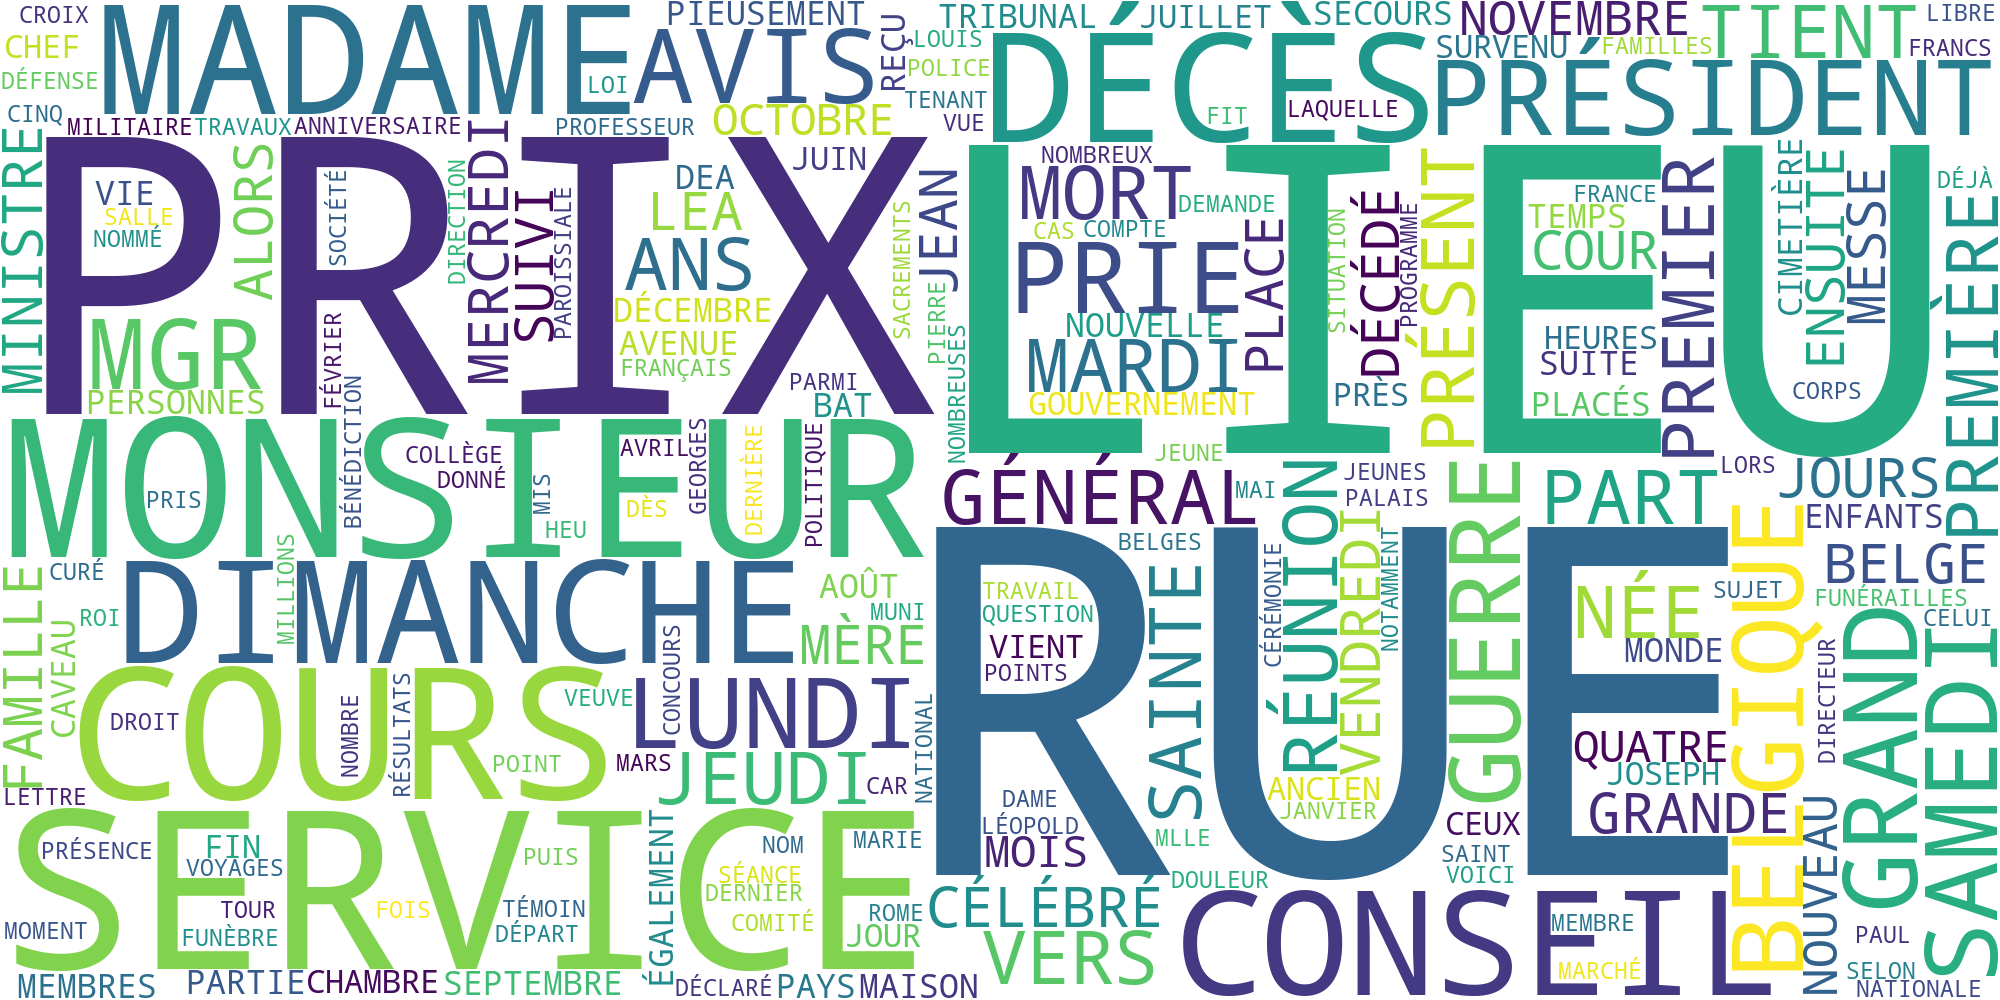

In [552]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

In [553]:

with open(output_file, 'r', encoding='utf-8') as f:
    words = f.read().split()  

target = "ÉCOLOGIE"
threshold = 80

similar_words = [w for w in words if fuzz.ratio(w, target) >= threshold]

frequencies = Counter(similar_words)

print(frequencies.most_common())

all_similar_words = list(frequencies.elements())

print(f"\nNombre total de mots similaires trouvés : {len(all_similar_words)}")
print(all_similar_words[:20])  

[('ECROLOGIE', 283), ('COLONIE', 68), ('THÉOLOGIE', 37), ('COLOGNE', 18), ('ÉCOLOGIE', 9), ('ÉCOLIER', 3), ('ÉCOLAGE', 1), ('GÉOLOGIE', 1), ('CHÉOLOGIE', 1), ('ECHOLOGIE', 1), ('PÉDOLOGIE', 1), ('IDÉOLOGIE', 1), ('COLOGIE', 1), ('CHOLOGIE', 1), ('ECOLOGIE', 1), ('ECEOLOGIE', 1), ('MECOLOGIE', 1)]

Nombre total de mots similaires trouvés : 429
['ECROLOGIE', 'ECROLOGIE', 'ECROLOGIE', 'ECROLOGIE', 'ECROLOGIE', 'ECROLOGIE', 'ECROLOGIE', 'ECROLOGIE', 'ECROLOGIE', 'ECROLOGIE', 'ECROLOGIE', 'ECROLOGIE', 'ECROLOGIE', 'ECROLOGIE', 'ECROLOGIE', 'ECROLOGIE', 'ECROLOGIE', 'ECROLOGIE', 'ECROLOGIE', 'ECROLOGIE']


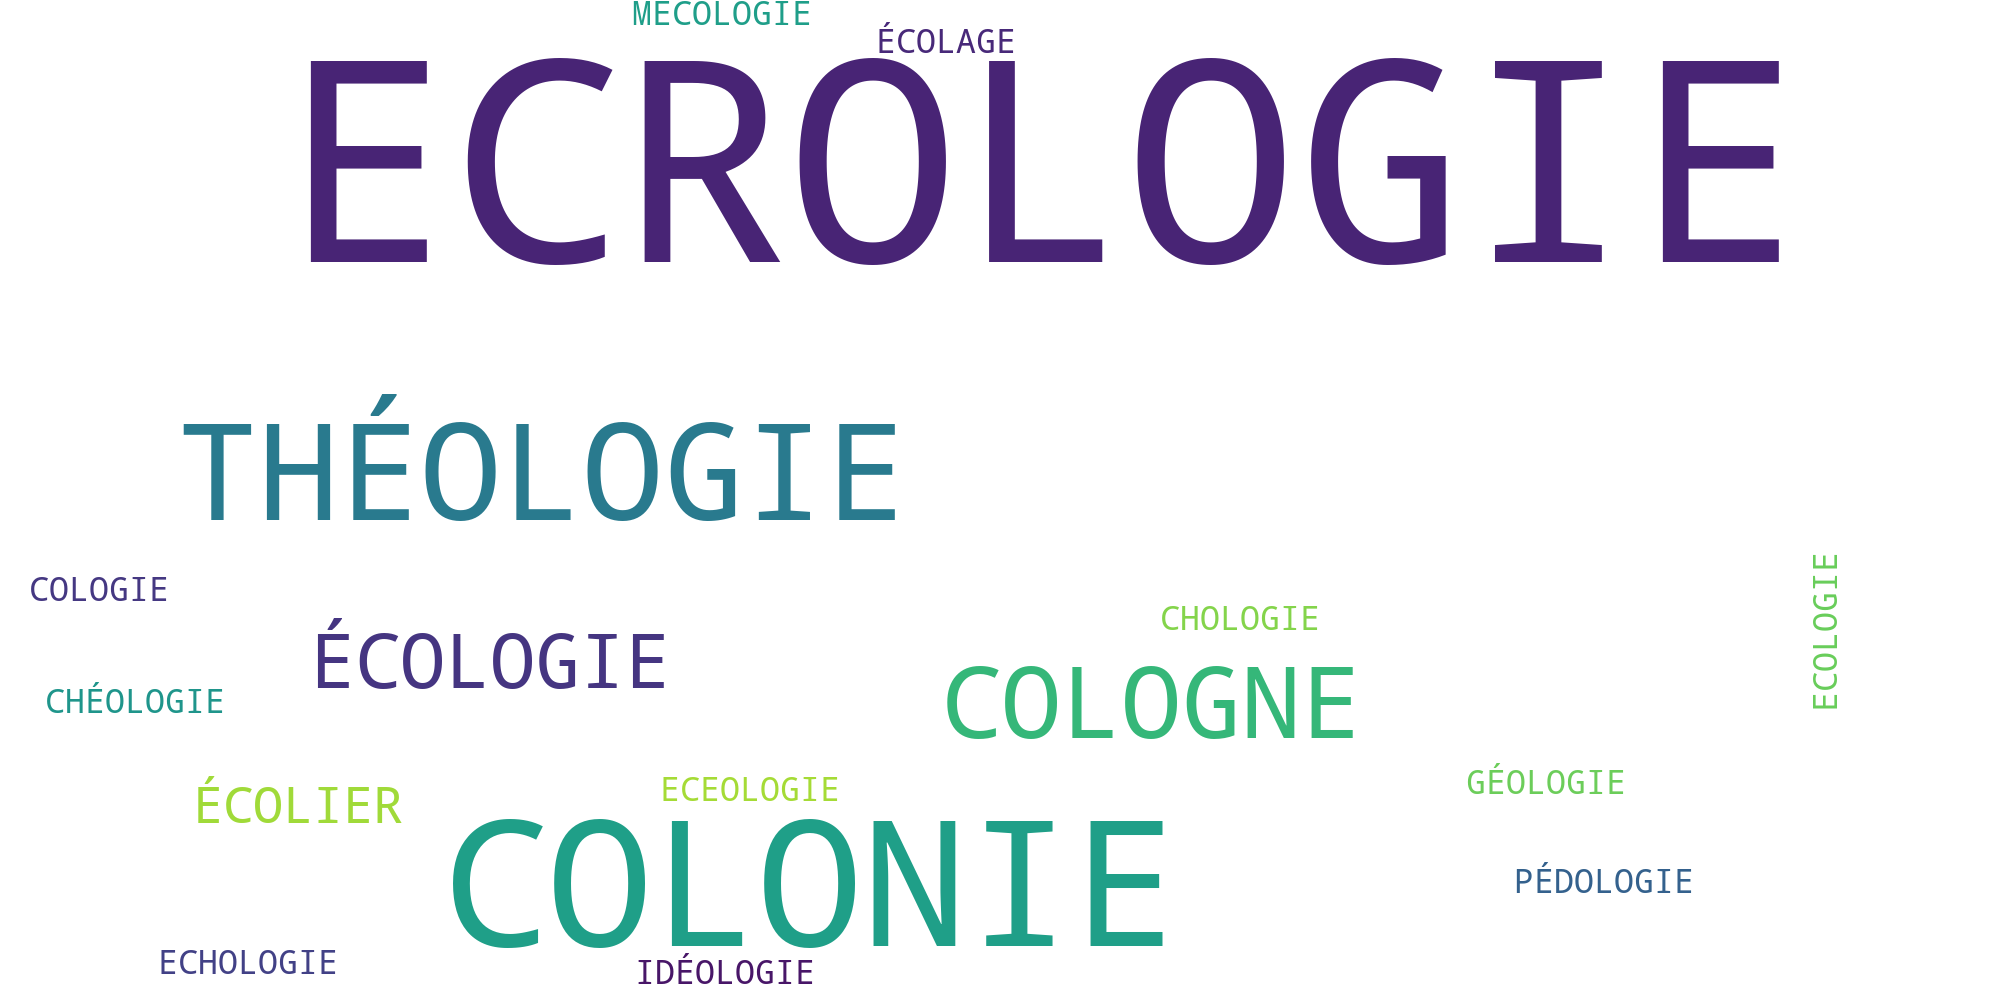

In [554]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

Clustering


In [591]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

In [589]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

In [624]:

ignore_files = ["_README.txt", "all.txt", "keywords.txt", "newspapers.model"]


files = [
    f for f in sorted(os.listdir(path))
    if f not in ignore_files
]

print(f"{len(files)} fichiers trouvés et lus.")


documents = []
for f in files:
    filepath = os.path.join(path, f)
    try:
        with open(filepath, "r", encoding="utf-8") as file:
            documents.append(file.read())
    except UnicodeDecodeError:
        # Si UTF-8 échoue, on tente Windows-1252
        with open(filepath, "r", encoding="windows-1252") as file:
            documents.append(file.read())

print(f"{len(documents)} documents lus avec succès.")


782 fichiers trouvés et lus.
782 documents lus avec succès.


In [625]:

tfidf_vectors = vectorizer.fit_transform(documents)

c:\Users\taleb\Desktop\ULB\STIC-B545 - Traitement automatique de corpus\TP\tac\tac_venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [626]:
# Détail de la matrice
tfidf_vectors

<782x3963 sparse matrix of type '<class 'numpy.float64'>'
	with 633756 stored elements in Compressed Sparse Row format>

In [627]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

congrès        0.611716
journaux       0.414471
‘              0.371200
entreprises    0.212121
amsterdam      0.186741
                 ...   
dévouement     0.000000
dîner          0.000000
e-             0.000000
ea             0.000000
♦              0.000000
Length: 3963, dtype: float64

In [640]:
N_CLUSTERS = 2

In [641]:
km_model = KMeans(n_clusters=N_CLUSTERS, random_state=42)

In [642]:
clusters = km_model.fit_predict(tfidf_vectors)

In [643]:
len(files)

782

In [644]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [645]:
pprint(dict(clustering))

{0: ['BE-KBR00_15463334_19781001_99_00_00_0_01_0024_29589967.txt',
     'BE-KBR00_15463334_19781201_100_00_00_0_01_0092_29591933.txt',
     'BE-KBR00_15463334_19790601_101_00_00_0_01_0124_29593641.txt',
     'BE-KBR00_15463334_19791101_103_00_00_0_01_0014_29592377.txt',
     'BE-KBR00_15463334_19890701_137_00_00_0_01_0079_29699927.txt',
     'KB_JB1051_1945-12-18_01-00003.txt',
     'KB_JB1051_1951-09-05_01-00005.txt',
     'KB_JB1051_1952-12-17_01-00004.txt',
     'KB_JB1051_1952-12-26_01-00004.txt',
     'KB_JB1051_1954-04-01_01-00004.txt',
     'KB_JB1051_1958-10-15_01-00004.txt',
     'KB_JB1051_1959-06-12_01-00001.txt',
     'KB_JB1051_1961-03-07_01-00001.txt',
     'KB_JB1051_1961-04-20_01-00001.txt',
     'KB_JB1051_1961-11-20_01-00003.txt',
     'KB_JB1051_1966-03-03_01-00002.txt',
     'KB_JB421_1901-02-18_01-00001.txt',
     'KB_JB421_1905-04-27_01-00001.txt',
     'KB_JB421_1906-10-08_01-00002.txt',
     'KB_JB421_1909-09-20_01-00001.txt',
     'KB_JB421_1909-11-14_01-00003.

In [646]:
pca = PCA(n_components=2,random_state=42)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [647]:
reduced_vectors[:10]

array([[ 0.11813914,  0.04496621],
       [-0.0094869 ,  0.04824883],
       [-0.01550717,  0.0248288 ],
       [-0.00770603,  0.05665851],
       [-0.01299869,  0.0560194 ],
       [-0.12076533, -0.06948484],
       [-0.09086573, -0.03499394],
       [-0.08084251, -0.03533985],
       [-0.09276569, -0.01496195],
       [-0.06974067, -0.01394049]])

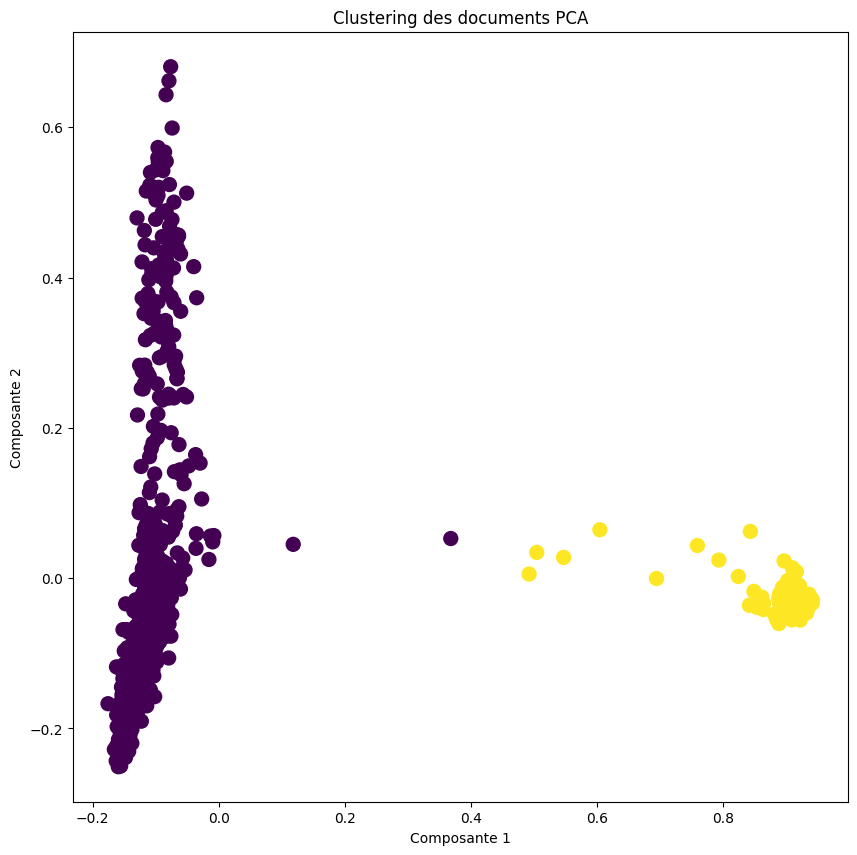

In [648]:
# Coordonnées déjà calculées
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
plt.scatter(x_axis, y_axis, s=100, c=clusters, cmap='viridis')
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.title("Clustering des documents PCA")
plt.savefig("clustersPCA.png")
plt.show()

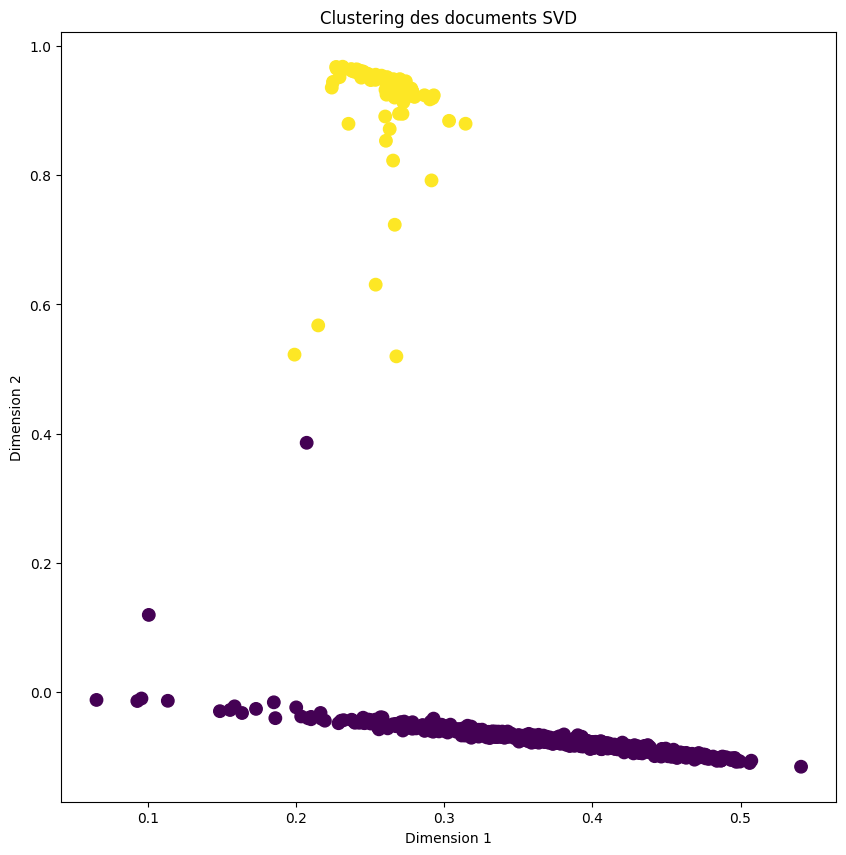

In [649]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Réduction de dimension à 2 composantes
svd = TruncatedSVD(n_components=2, random_state=42)
reduced_vectors_svd = svd.fit_transform(tfidf_vectors)

# Préparer les axes
x_axis = reduced_vectors_svd[:, 0]
y_axis = reduced_vectors_svd[:, 1]

# Tracé du scatter plot
plt.figure(figsize=(10,10))
plt.scatter(x_axis, y_axis, s=80, c=clusters, cmap='viridis')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Clustering des documents SVD")
plt.savefig("clustersSVD.png")
plt.show()


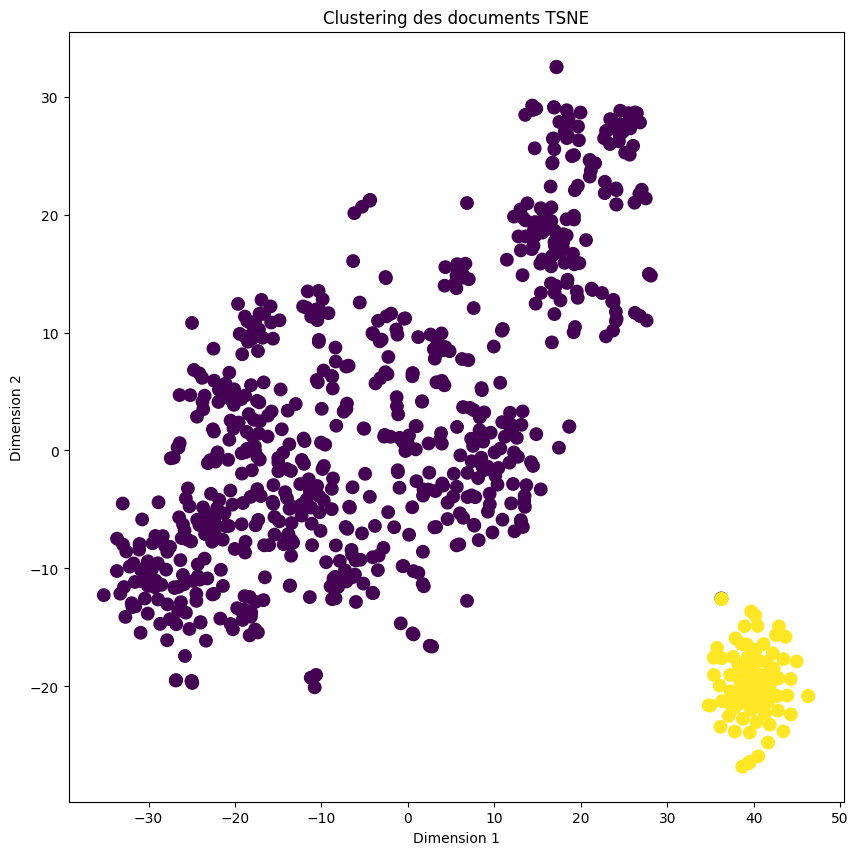

In [650]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30)
reduced_vectors_tsne = tsne.fit_transform(tfidf_vectors.toarray())

x_axis = reduced_vectors_tsne[:, 0]
y_axis = reduced_vectors_tsne[:, 1]
plt.figure(figsize=(10,10))
plt.scatter(x_axis, y_axis, s=80, c=clusters, cmap='viridis')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Clustering des documents TSNE")
plt.savefig("clustersTSNE.png")
plt.show()

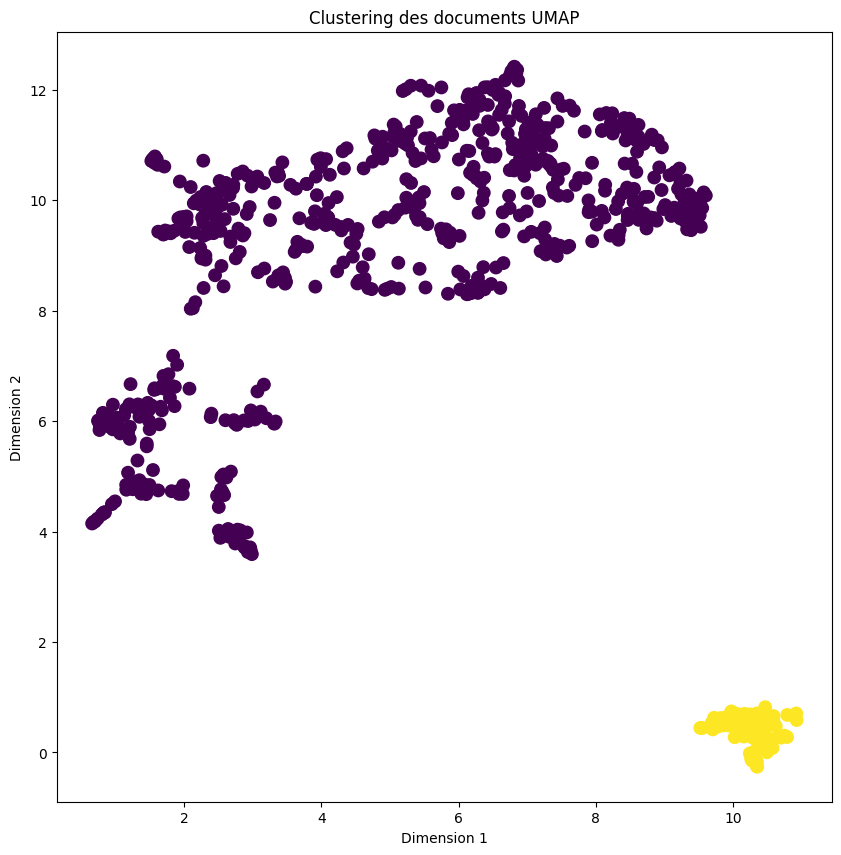

In [651]:
#!pip install umap-learn
import umap

umap_model = umap.UMAP(n_components=N_CLUSTERS)
reduced_vectors_umap = umap_model.fit_transform(tfidf_vectors)

x_axis = reduced_vectors_umap[:, 0]
y_axis = reduced_vectors_umap[:, 1]
plt.figure(figsize=(10,10))
plt.scatter(x_axis, y_axis, s=80, c=clusters, cmap='viridis')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Clustering des documents UMAP")
plt.savefig("clustersUMAP.png")
plt.show()

In [796]:
target = "ECOLOGIE"
threshold = 80
skip_files = ["_README.txt", "all.txt", "keywords.txt", "newspapers.model"]

documents = []
files = []

for filename in os.listdir(path):
    if filename in skip_files:
        continue

    file_path = os.path.join(path, filename)

    if os.path.isfile(file_path) and filename.endswith(".txt"):
        with open(file_path, "r", encoding="utf-8") as f:
            content = f.read()
            words = content.split()

        # mots similaires
        similar_words = [w for w in words if fuzz.ratio(w, target) >= threshold]

        if similar_words:
            documents.append(content)
            files.append(filename)
            all_similar_words.extend(similar_words)
            

print(f"Nombre de documents pertinents : {len(documents)}")
print(f"Nombre de fichiers correspondants : {len(files)}")

if not documents:
    raise ValueError("Aucun document ne contient le mot cible.")

vectorizer = TfidfVectorizer(min_df=1, max_df=len(documents))
tfidf_vectors = vectorizer.fit_transform(documents)

pprint(all_similar_words)

Nombre de documents pertinents : 489
Nombre de fichiers correspondants : 489
['ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',
 'ECROLOGIE',

In [ ]:
def preprocessing(text):
    text = text.translate(str.maketrans("", "", string.punctuation))
    tokens = word_tokenize(text)
    return tokens

In [ ]:
tfidf_vectors

<489x226863 sparse matrix of type '<class 'numpy.float64'>'
	with 1284980 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf_series = pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
).sort_values(ascending=False)

print("\nTop mots TF-IDF du premier document :")
print(tfidf_series.head(20))


Top mots TF-IDF du premier document :
de            0.531332
la            0.312819
le            0.239214
les           0.232314
et            0.190911
des           0.177111
que           0.129071
est           0.124207
du            0.119607
en            0.112707
une           0.098906
qui           0.087405
communiste    0.086784
par           0.075905
suppleants    0.074769
pour          0.073604
ce            0.066704
un            0.066704
matadi        0.061620
politique     0.060430
dtype: float64


In [ ]:
N_CLUSTERS = 3
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=46)
clusters = kmeans.fit_predict(tfidf_vectors)

In [ ]:
clustering = collections.defaultdict(list)
for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

print("\nRépartition des clusters :")
pprint(dict(clustering))


Répartition des clusters :
{0: ['KB_JB1051_1961-03-07_01-00001.txt',
     'KB_JB1051_1961-11-20_01-00003.txt',
     'KB_JB427_1927-05-30_01-00001.txt',
     'KB_JB427_1933-02-18_01-00003.txt',
     'KB_JB427_1934-02-13_01-00003.txt',
     'KB_JB427_1935-12-27_01-00006.txt',
     'KB_JB427_1937-12-23_01-00006.txt',
     'KB_JB427_1938-04-28_01-00005.txt',
     'KB_JB427_1938-09-04_01-00005.txt',
     'KB_JB427_1938-11-13_01-00006.txt',
     'KB_JB427_1938-12-29_01-00004.txt',
     'KB_JB427_1939-02-12_01-00006.txt',
     'KB_JB427_1939-03-01_01-00005.txt',
     'KB_JB427_1939-03-03_01-00006.txt',
     'KB_JB427_1939-03-11_01-00005.txt',
     'KB_JB427_1939-03-15_01-00006.txt',
     'KB_JB427_1939-03-16_01-00005.txt',
     'KB_JB427_1939-03-17_01-00005.txt',
     'KB_JB427_1939-04-09_01-00006.txt',
     'KB_JB427_1939-04-22_01-00005.txt',
     'KB_JB427_1939-04-25_01-00005.txt',
     'KB_JB427_1939-05-25_01-00006.txt',
     'KB_JB427_1939-06-25_01-00004.txt',
     'KB_JB427_1939-12-01_0

In [ ]:
pprint(dict(clustering))

{0: ['KB_JB1051_1961-03-07_01-00001.txt',
     'KB_JB1051_1961-11-20_01-00003.txt',
     'KB_JB427_1927-05-30_01-00001.txt',
     'KB_JB427_1933-02-18_01-00003.txt',
     'KB_JB427_1934-02-13_01-00003.txt',
     'KB_JB427_1935-12-27_01-00006.txt',
     'KB_JB427_1937-12-23_01-00006.txt',
     'KB_JB427_1938-04-28_01-00005.txt',
     'KB_JB427_1938-09-04_01-00005.txt',
     'KB_JB427_1938-11-13_01-00006.txt',
     'KB_JB427_1938-12-29_01-00004.txt',
     'KB_JB427_1939-02-12_01-00006.txt',
     'KB_JB427_1939-03-01_01-00005.txt',
     'KB_JB427_1939-03-03_01-00006.txt',
     'KB_JB427_1939-03-11_01-00005.txt',
     'KB_JB427_1939-03-15_01-00006.txt',
     'KB_JB427_1939-03-16_01-00005.txt',
     'KB_JB427_1939-03-17_01-00005.txt',
     'KB_JB427_1939-04-09_01-00006.txt',
     'KB_JB427_1939-04-22_01-00005.txt',
     'KB_JB427_1939-04-25_01-00005.txt',
     'KB_JB427_1939-05-25_01-00006.txt',
     'KB_JB427_1939-06-25_01-00004.txt',
     'KB_JB427_1939-12-01_01-00005.txt',
     'KB_JB427

In [ ]:
pca = PCA(n_components=2, random_state=42)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

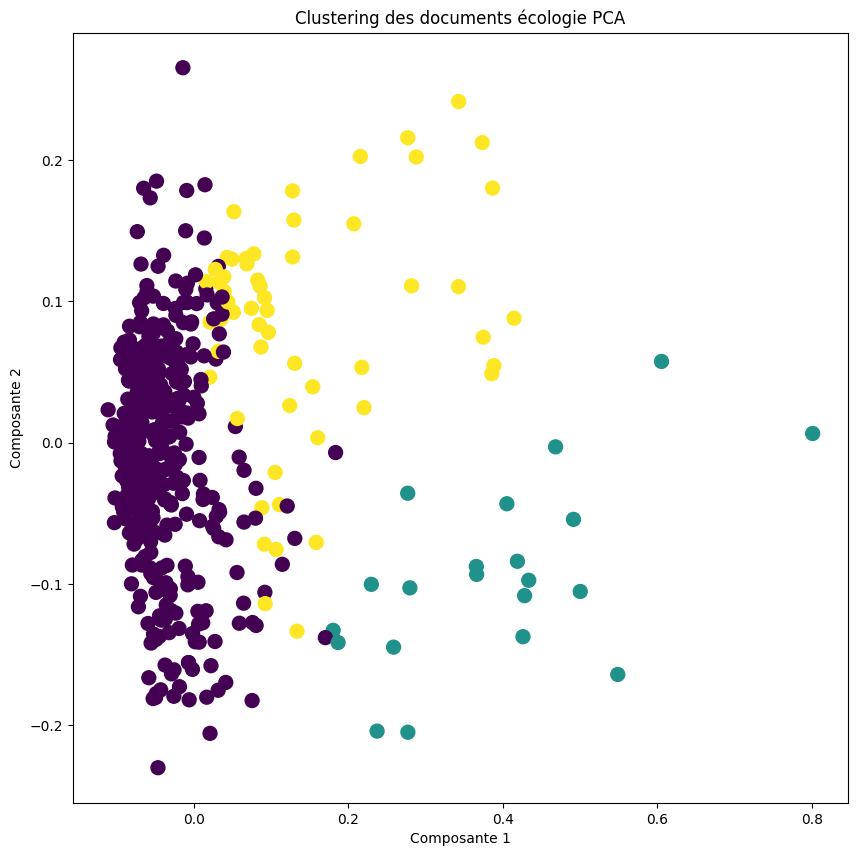

In [ ]:
# Coordonnées déjà calculées
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
plt.scatter(x_axis, y_axis, s=100, c=clusters, cmap='viridis')
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.title("Clustering des documents écologie PCA")
plt.savefig("clustersPCAecologie.png")
plt.show()

Word Embedding

In [798]:
from nltk.tokenize import WordPunctTokenizer
from unidecode import unidecode 
wordpunct_tokenize = WordPunctTokenizer().tokenize
class MySentences(object):
    """Tokenize and Lemmatize sentences"""
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8', errors="backslashreplace"):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]



In [799]:
# Lire le corpus
with open("../../data/camille_ecologie/all.txt", "r", encoding="utf-8") as f:
    text = f.read()

# Segmenter le texte en phrases
from nltk.tokenize import sent_tokenize
sentences_list  = sent_tokenize(text, language='french')

# Afficher les 10 premières phrases
with open("sents.txt", "w", encoding="utf-8") as f:
    for sentence in sentences_list :
        f.write(sentence + "\n")

In [800]:
infile = f"sents.txt"
sentences = MySentences(infile)

In [ ]:
bigram_phrases = Phrases(sentences, min_count=5, threshold=10)

In [ ]:
len(bigram_phrases.vocab.keys())

2280623

In [ ]:
bigram_phraser = Phraser(phrases_model=bigram_phrases)

In [ ]:
trigram_phrases = Phrases(bigram_phraser[sentences])

In [ ]:
trigram_phraser = Phraser(phrases_model=trigram_phrases)

In [ ]:
corpus = list(trigram_phraser[bigram_phraser[sentences]])

In [ ]:
print(corpus[:100])

[[], ['ii', '|', 'e', 'oh', 'son', 'wan', 'en', '__22', 'l', "'", 'expo', '(', 'la', 'huitieme', 'exposition_organisee', 'avec', 'un', 'congres', 'de', 'iifra', 'et', 'ouverte', 'le', '4', 'septembre', 'au', 'matin', ',', 'comme', 'd', "'", 'habitude', 'sans', 'formalite', ')', 'fut', 'occupee_par', '86', 'exposants', '(', '1976', '=', '76', ',', '1977', '=', '82', ')', 'de', '11', 'pays', 'differents', ',', 'sur', 'une', 'surface', 'de', 'stands', 'de', 'plus', 'de', '5200', 'm', '?'], ['(', '1976', 'plus', 'de', '3000', 'm', '?,', '1977', 'pres', 'de', '4000', 'm', '?).'], ['le', 'nombre_des', 'personnes', 'visitant', 'uniquement', 'l', "'", 'exposition', 'a', 'egalement', 'augmente', 'par', 'rapport', 'a', 'lan', 'dernier', '.'], ['depuis', 'le', 'congres', 'de', 'i', "'", 'ifra', "'", '77', ',', 'le', 'nombre_des', 'membres', 'de', '[', 'ifra', 'est', 'passe', 'de', '280', '(', '240', '+', '40', ')', 'a', '304', '(', '261', 'entreprises', 'de', 'journaux', 'dans', 'le', 'monde_enti

In [ ]:
%%time
model = Word2Vec(
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=5, # La taille du "contexte", ici 5 mots avant et après le mot observé
    min_count=5, # On ignore les mots qui n'apparaissent pas au moins 5 fois dans le corpus
    workers=2, # Permet de paralléliser l'entraînement du modèle en 4 threads
    epochs=5 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descente de gradient, aka. epochs.
)

CPU times: total: 1min 54s
Wall time: 1min 3s


In [ ]:
outfile = f"../../data/camille_ecologie/newspapers.model"
model.save(outfile)

In [ ]:
model.wv["ecologie"]

array([-7.77413726e-01, -3.60710472e-02,  1.22676745e-01,  3.80890995e-01,
        1.73544958e-01, -2.38529831e-01,  7.22901881e-01, -5.02294041e-02,
        9.41995233e-02, -3.95021681e-03,  5.07952988e-01, -7.60993958e-02,
        4.82043505e-01, -5.38275301e-01,  1.66652694e-01, -1.74678475e-01,
       -4.06511515e-01, -2.17291757e-01,  2.29267463e-01,  5.31106174e-01,
        5.89029253e-01,  2.25508139e-01,  8.69674802e-01, -5.47130704e-01,
       -1.44247606e-01,  7.79233515e-01, -1.01603842e+00,  3.86313014e-02,
        2.10971819e-04, -4.24316257e-01,  1.07672460e-01,  3.07835132e-01],
      dtype=float32)

In [ ]:
model.wv.most_similar("ecologie", topn=30)

[('arti', 0.8821876645088196),
 ('optique', 0.8740730881690979),
 ('politi', 0.8699052333831787),
 ('rej', 0.8676202893257141),
 ('iiw', 0.859743595123291),
 ('nais', 0.858898401260376),
 ('caritas', 0.8561021089553833),
 ('ale', 0.8555719256401062),
 ('docu', 0.8545418977737427),
 ('ement', 0.8540612459182739),
 ('oire', 0.85383540391922),
 ('sta', 0.8527092337608337),
 ('nacht', 0.8522326350212097),
 ('ation', 0.851227879524231),
 ('cyrano', 0.8507806062698364),
 ('die', 0.8497819900512695),
 ('primaire', 0.8493425846099854),
 ('genetique', 0.8485855460166931),
 ('les_amis', 0.847555935382843),
 ('geographie', 0.8472460508346558),
 ('tueur', 0.845870852470398),
 ('ligue', 0.845317006111145),
 ('fronce', 0.8449340462684631),
 ('boss', 0.8446337580680847),
 ('pin', 0.844092071056366),
 ('hon', 0.8436663746833801),
 ('inte', 0.8426322340965271),
 ('bibliographie', 0.8420752882957458),
 ('iste', 0.8413727283477783),
 ('alre', 0.8400577306747437)]

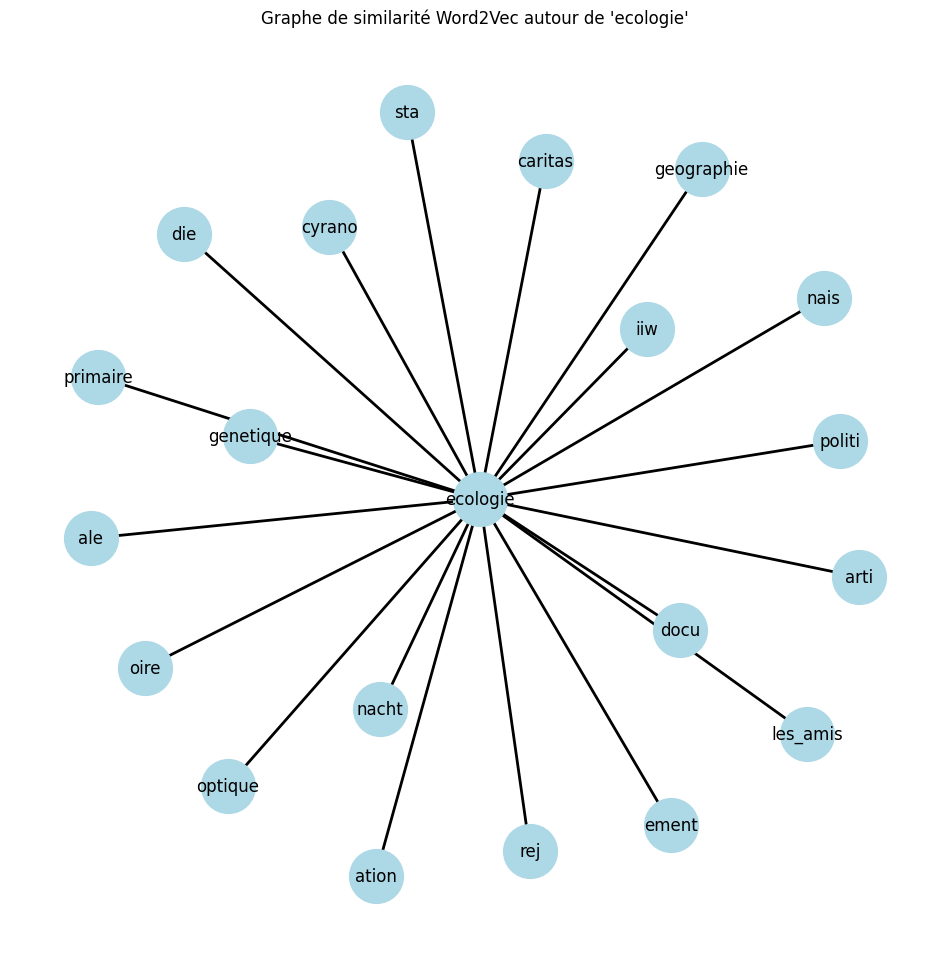

In [ ]:

G = nx.Graph()

# sélectionner quelques mots
center_word = "ecologie"
similar = model.wv.most_similar(center_word, topn=20)

# Ajouter le mot central
G.add_node(center_word)

# Ajouter les mots similaires
for word, score in similar:
    G.add_node(word)
    G.add_edge(center_word, word, weight=score)

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k=0.5)

nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=1500)
nx.draw_networkx_edges(G, pos, width=2)
nx.draw_networkx_labels(G, pos)

plt.title(f"Graphe de similarité Word2Vec autour de '{center_word}'")
plt.axis("off")
plt.show()